In [1]:
import zipfile
import os

import sys
sys.path.insert(1, '../scripts')
import files
import visualize

In [2]:
base_dir = '../data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [3]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)
print(train_cats_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']


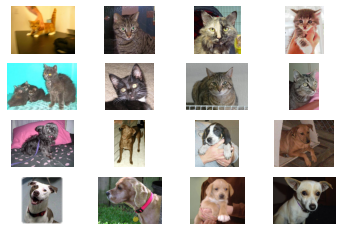

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

first_image = 0
ncol = 4
nrow = 4

cats_fnames = [os.path.join(train_cats_dir, filename) for filename in train_cats_fnames[first_image: first_image+8]]
dogs_fnames = [os.path.join(train_dogs_dir, filename) for filename in train_dogs_fnames[first_image: first_image+8]]

visualize.showImages(cats_fnames+dogs_fnames, 4, 4)


In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=2)

Epoch 1/15
100/100 - 6s - loss: 0.8298 - accuracy: 0.5475 - val_loss: 0.8016 - val_accuracy: 0.5110 - 6s/epoch - 60ms/step
Epoch 2/15
100/100 - 4s - loss: 0.6311 - accuracy: 0.6645 - val_loss: 0.5722 - val_accuracy: 0.7210 - 4s/epoch - 41ms/step
Epoch 3/15
100/100 - 4s - loss: 0.5324 - accuracy: 0.7420 - val_loss: 0.5590 - val_accuracy: 0.7190 - 4s/epoch - 40ms/step
Epoch 4/15
100/100 - 4s - loss: 0.4576 - accuracy: 0.7785 - val_loss: 0.5419 - val_accuracy: 0.7260 - 4s/epoch - 39ms/step
Epoch 5/15
100/100 - 4s - loss: 0.3845 - accuracy: 0.8280 - val_loss: 0.5339 - val_accuracy: 0.7480 - 4s/epoch - 40ms/step
Epoch 6/15
100/100 - 4s - loss: 0.3005 - accuracy: 0.8740 - val_loss: 0.5777 - val_accuracy: 0.7500 - 4s/epoch - 39ms/step
Epoch 7/15
100/100 - 4s - loss: 0.2036 - accuracy: 0.9155 - val_loss: 0.7976 - val_accuracy: 0.7340 - 4s/epoch - 40ms/step
Epoch 8/15
100/100 - 4s - loss: 0.1579 - accuracy: 0.9430 - val_loss: 0.8118 - val_accuracy: 0.7510 - 4s/epoch - 38ms/step
Epoch 9/15
100/1

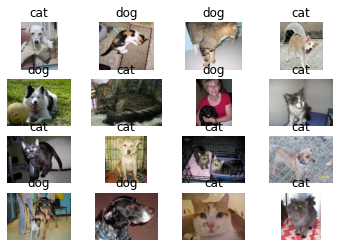

In [54]:
# predict one image
from tensorflow.keras.preprocessing import image
import numpy as np
import visualize as v
import random as rd

image_nums = rd.sample(range(1, 10000), 16)
image_names = [str(num) + '.jpg' for num in image_nums]
test_image_paths = [os.path.join('../data/dogs-vs-cats/test1/', image_name) for image_name in image_names]

for i, path in enumerate(test_image_paths):
    img = image.load_img(path, target_size = (150, 150))
    x = image.img_to_array(img)
    x /= 255.
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    sp.set_title('dog' if classes[0] > 0.5 else 'cat')
    img = mpimg.imread(path)
    plt.imshow(img)
plt.show()


D:\WorkDocuments\pythonTensorflowEnv\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


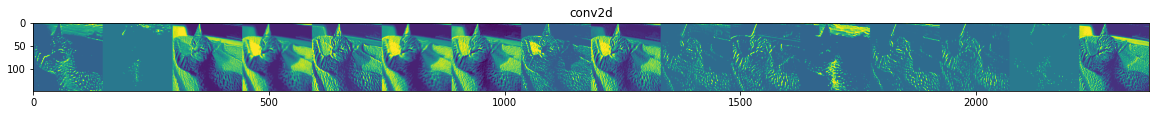

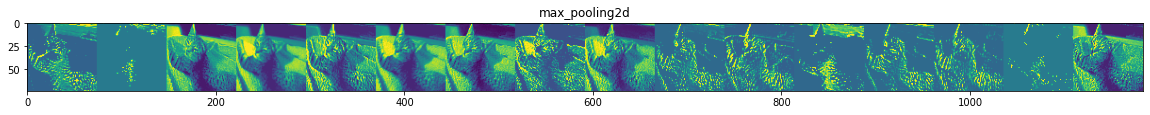

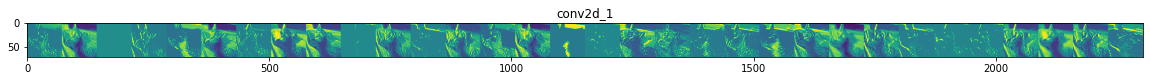

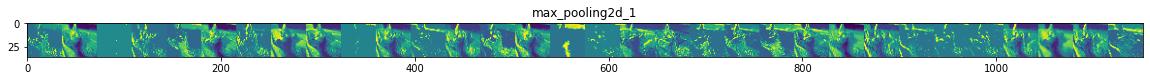

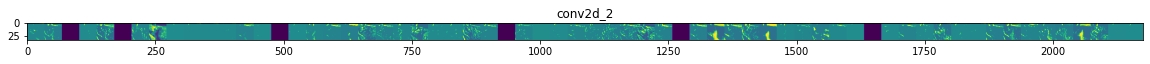

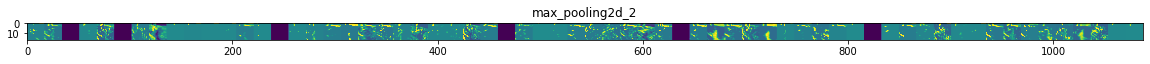

In [58]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

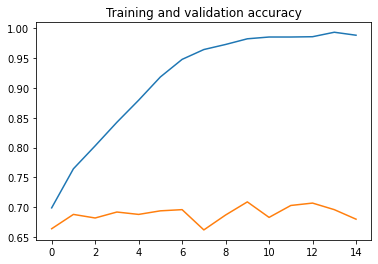

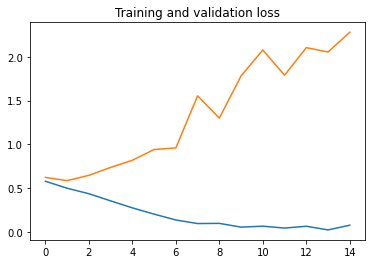

In [59]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )